In [ ]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

In [ ]:
!pip install imgaug
!pip install siphon

# Instalando a Biblioteca Pygrib
!pip install pygrib
#print('\n')

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force
#print('\n')

# Instalando a Biblioteca MetPy
!pip install MetPy
#print('\n')

# Instalando a Biblioteca Boto3
!pip install boto3
#print('\n')

# Instalando a Biblioteca NetCDF4
!pip install netcdf4
#print('\n')

# Instalando / atualizando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'
#print('\n')

# Install ImageMagick
!sudo apt install imagemagick
#print('\n')

In [ ]:
# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
#print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
#print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
#print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
#print('\n')

# Download do script "utilities.py", do curso de processamento de satélites, com algumas funções que facilitam a manipulação de dados de satélite
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py
#print('\n')

# Download da arquivo CPT exemplo (para realce de canais IR)
!wget -c https://www.dropbox.com/s/fdgnaqt91cy3x97/IR4AVHRR6.cpt
#print('\n')

# Download da arquivo CPT exemplo (para realce de canais WV
!wget -c https://www.dropbox.com/s/4l9fys6pv5c68xk/SVGAWVX_TEMP.cpt
#print('\n')

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWP Data Processing With Python - NWP Download with Python (GFS)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------

# Required modules
from datetime import datetime        # Basic Dates and time types
import os                            # Miscellaneous operating system interfaces
import requests                      # HTTP library for Python
import time as t                     # Time access and conversion
#-----------------------------------------------------------------------------------------------------------

print('---------------------------------------')
print('GFS Download (NOMADS) - Script started.')
print('---------------------------------------')

# Start the time counter
start_time = t.time()

# Desired date (last 10 days only!): Format - 'YYYY, MM, DD, HH'
dt = datetime(2023, 3, 20, 12)
yyyymmddhhmn = (f'{dt:%Y%m%d%H}00') # Data e hora da imagem de satélite

#-----------------------------------------------------------------------------------------------------------

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Desired date (last 10 days only!): Format - 'YYYYMMDD'
#date = datetime.today().strftime('%Y%m%d')
date = (f'{dt:%Y%m%d}')

# Desired extent - COLOCAR AQUI ENTRE ASPAS POIS É UMA STRING
# longitude de -180 a 180
min_lon = '-122.50'
max_lon = '12.50'
min_lat = '-25.0'
max_lat = '25.0'

# Desired resolution: '25' or '50' or '1'
resolution = '1'

# Desired run: '00' or '06' or '12' or '18'
#hour_run = '00'
hour_run=(f'{dt:%H}')

# Desired forecast hours
hour_ini = 0  # Init time
hour_end = 0 # End time
hour_int = 3  # Interval

if (resolution == '25'):
  res = 'pgrb2.0p'+resolution+'.f'
elif (resolution == '50'):
  res = 'pgrb2.0p'+resolution+'.f'
elif (resolution == '1'):
  res = 'pgrb2.'+resolution+'p00.f'

#-----------------------------------------------------------------------------------------------------------

# Link (select "grib filter" and check "Show the URL only for web programming" to verify the URL's):
# https://nomads.ncep.noaa.gov/

def download_gfs(date, iii):

    # Create the URL's based on the resolution
    if (resolution == '25'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
        res = 'prgb2.0p'+resolution+'.f'
    elif (resolution == '50'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2full.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
        res = 'prgb2.0p'+resolution+'.f'
    elif (resolution == '1'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_'+resolution+'p00.pl?file=gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)
        res = 'prgb2.'+resolution+'p00.f'

    # Print the file name
    print("File name: ", file_name)
    # Sends a GET request to the specified url
    myfile = requests.get(url)

    # Download the file
    open(dir + '//' + file_name, 'wb').write(myfile.content)

#-----------------------------------------------------------------------------------------------------------

# Download loop
for hour in range(hour_ini, hour_end + 1, hour_int):
    print('\n---------------------')
    print('Downloading GFS File:')
    print('---------------------')
    print('Resolution: ' + resolution)
    print('Date: ' + date)
    print('Run: ' + hour_run)
    print('Forecast Hour: f' + str(hour).zfill(3))
    # Call the download function
    download_gfs(date,hour)

#-----------------------------------------------------------------------------------------------------------

# End the time counter
print('\nTotal Processing Time:', round((t.time() - start_time),2), 'seconds.')
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 22 - Satellite + NWP Plot (Example 3)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
#lembrar que longitude está definida entre -180 e 180
extent = [float(min_lon), float(min_lat), float(max_lon), float(max_lat)]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

#-----------------------------------------------------------------------------------------------------------
date = (f'{dt:%Y%m%d}')
yyyymmddhhmn = (f'{dt:%Y%m%d%H}00') # Data e hora da imagem de satélite
hour_run=(f'{dt:%H}')

# Download the ABI file channel 13 - Clean IR
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open(f'Samples/gfs.t{hour_run}z.{res}000')

# Select the variable
mslp = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(mslp.analDate)      # Init date / time
run   = str(mslp.hour).zfill(2) # Run
ftime = str(mslp.forecastTime)  # Forecast hour
valid = str(mslp.validDate)     # Valid date / time
#print('Init: ' + init + ' UTC')
#print('Run: ' + run + 'Z')
#print('Forecast: +' + ftime)
#print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
# longitude tem que estar entre 0 e 360 graus
mslp, lats, lons = mslp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])

# Convert to hPa
mslp = mslp / 100
# Select the variable
prtwt = grib.select(name='Precipitable water')[0]
prtwt = prtwt.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
u_925 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 925)[0]
# Read the data for a specific region
u_925, lats, lons = u_925.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])
# Select the variable
v_925 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 925)[0]
# Read the data for a specific region
v_925 = v_925.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
u_250 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]
# Read the data for a specific region
u_250, lats, lons = u_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])
# Select the variable
v_250 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]
# Read the data for a specific region
v_250 = v_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
w_850 = grib.select(name='Vertical velocity', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
w_850 = w_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]
# Select the variable
w_500 = grib.select(name='Vertical velocity', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
w_500 = w_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
temp_850 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
temp_850 = temp_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
relhum_800 = grib.select(name='Relative humidity', typeOfLevel = 'isobaricInhPa', level = 800)[0]
# Read the data for a specific region
relhum_800 = relhum_800.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]
# Select the variable
relhum_850 = grib.select(name='Relative humidity', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
relhum_850 = relhum_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]
# Select the variable
relhum_700 = grib.select(name='Relative humidity', typeOfLevel = 'isobaricInhPa', level = 700)[0]
# Read the data for a specific region
relhum_700 = relhum_700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

#-----------------------------------------------------------------------------------------------------------
from metpy.units import units
import metpy.calc as mpcalc
import numpy.ma as ma

# calculando umidade relativa média entre 800 e 700 hPa
relhum = (relhum_800 + relhum_850 + relhum_700)/3

# Calculando divergencia em 925 hPa
nivel=925
pressure = units('Pa')*nivel*100
u_925 = units('m/s')*u_925
v_925 = units('m/s')*v_925
# Calculando com metpy
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
# Compute the divergence
div_925 = mpcalc.divergence(u_925, v_925, dx=dx, dy=dy)
# quero somente convergencia
mask_conv = ma.masked_greater_equal(div_925, 0).mask
div_925[mask_conv] = np.nan

# Calculando divergencia em 250 hPa
nivel=250
pressure = units('Pa')*nivel*100
u_250 = units('m/s')*u_250
v_250 = units('m/s')*v_250
# Calculando com metpy
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
# Compute the divergence
div_250 = mpcalc.divergence(u_250, v_250, dx=dx, dy=dy)
# quero somente divergencia
mask_div = ma.masked_less_equal(div_250, 0).mask
div_250[mask_div] = np.nan

#Quero somente os valores negativos de omega
mask_omega = ma.masked_greater_equal(w_850, 0).mask
w_850[mask_omega] = np.nan

mask_omega = ma.masked_greater_equal(w_500, 0).mask
w_500[mask_omega] = np.nan

#Quero somente valores maiores q 40
mask_prtwt = ma.masked_less(prtwt, 40).mask
prtwt[mask_prtwt] = np.nan

**Imagen de satélite + Linhas de corrente 925 hPa + Agua precipitável + omega 500 hPa**

In [ ]:
# ZCIT LC 925 + PRT WT + OMEGA 500
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
# Converts a CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=0.7)
# Add a colorbar
plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.03, aspect = 50)

# Plotando agua precipitavel acima de 40 mm
clevppt = np.arange(40, 70, 5)
cs2 = ax.contourf(lons, lats,prtwt,clevppt,cmap = 'Greens', alpha=0.4)
cb = plt.colorbar(cs2,label='PRT_WT (mm)',orientation="horizontal", pad=0.05,aspect=50)

#Plotando omega negativo
#cs = ax.contour(lons, lats,w_500*1e4, colors='yellow', linewidths=1.25,linestyles='--',transform=ccrs.PlateCarree(), alpha=0.7)
cs = ax.contour(lons, lats,w_500*1e4, colors='red', linewidths=1.25,linestyles='--',transform=ccrs.PlateCarree(), alpha=0.7)

ax.streamplot(lons, lats, u_925, v_925, density=[0.7, 1], linewidth=1, color='black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Ch13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS: PRT_WT (mm), 500hPa NegOmega (red --) 925 hPa Wind (LC)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/ZCIT_925LC_PrtWt_Om500.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


**Linhas de corrente 925 hPa + omega em 850 hPa + UR(800-700)**

In [ ]:
# ZCIT LC 925 + UR medio (700-800hPa) + OMEGA 850
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
# Converts a CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=0.7)
# Add a colorbar
#plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.03, aspect = 50)

# Plotando UR
clevrh = np.arange(70, 101, 5)
cs2 = ax.contourf(lons, lats,relhum,clevrh,cmap = 'Greens',alpha=0.4)
cb = plt.colorbar(cs2,label='RH (%)',orientation="horizontal", pad=0.05,aspect=50)

#Plotando omega negativo
cs = ax.contour(lons, lats,w_850*1e4, colors='red', linewidths=1.25,linestyles='--',transform=ccrs.PlateCarree(), alpha=0.7)

ax.streamplot(lons, lats, u_925, v_925, density=[0.7, 1], linewidth=1, color='black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Ch13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS: RH800-700 (%), 850hPa NegOmega (red --) 925 hPa Wind (LC)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/ZCIT_925LC_RelHum_Om850.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


**Satélite + Linhas de corrente 925 hPa + convergência 925 hPa**

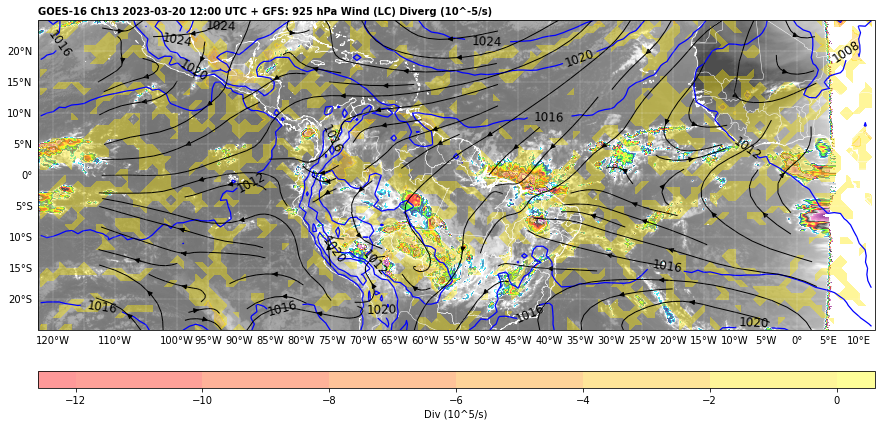

In [ ]:
# ZCIT conv 925
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
# Converts a CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=0.7)
# Add a colorbar
#plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.03, aspect = 50)

# Plot MSLP
clevmslp = np.arange(800., 1120., 4)
cs = ax.contour(lons, lats, mslp, clevmslp, colors='blue', linewidths=1.25,linestyles='solid',transform=ccrs.PlateCarree())
ax.clabel(cs, fontsize=12, colors='black', inline=1, inline_spacing=8,
          fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot the colorfill of divergence, scaled 10^5 every 1 s^1
clevdiv = np.arange(-12, 0.5, 2)
cs1 = ax.contourf(lons, lats, div_925*1e5, clevdiv, cmap='autumn', alpha = 0.4,
                  extend='both', transform=ccrs.PlateCarree())
plt.colorbar(cs1, label='Div (10^5/s)',orientation='horizontal', pad=0.05, aspect=50, extendrect=True)

ax.streamplot(lons, lats, u_925, v_925, density=[0.7, 1], linewidth=1, color='black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Ch13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS: 925 hPa Wind (LC) Diverg (10^-5/s)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/ZCIT_925LC_Div.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


**Satélite + linhas de corrente 250 hPa + divergência 250 hPa**

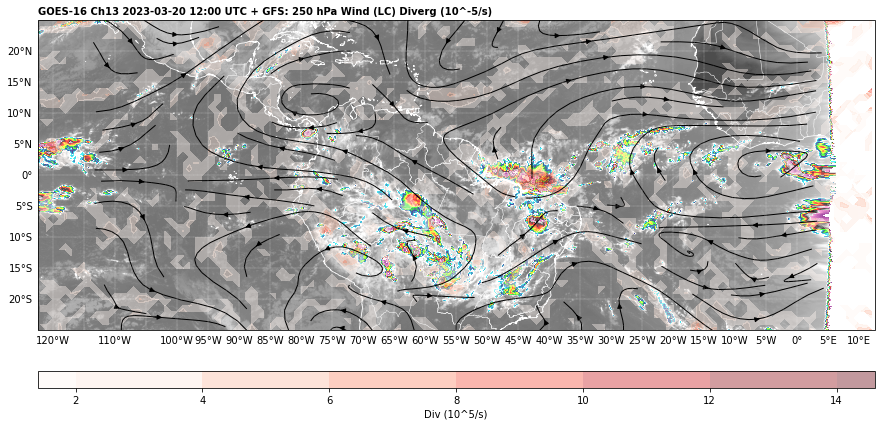

In [ ]:
# ZCIT div 250
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
# Converts a CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=0.7)
# Add a colorbar
#plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.03, aspect = 50)

# Plot MSLP
#clevmslp = np.arange(800., 1120., 4)
#cs = ax.contour(lons, lats, mslp, clevmslp, colors='black', linewidths=1.25,linestyles='solid',transform=ccrs.PlateCarree())
#ax.clabel(cs, fontsize=12, colors='black', inline=1, inline_spacing=8,
#          fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot the colorfill of divergence, scaled 10^5 every 1 s^1
cs1 = ax.contourf(lons, lats, div_250*1e5, cmap='Reds', alpha = 0.4,
                  extend='both', transform=ccrs.PlateCarree())
plt.colorbar(cs1, label='Div (10^5/s)',orientation='horizontal', pad=0.05, aspect=50, extendrect=True)

ax.streamplot(lons, lats, u_250, v_250, density=[0.7, 1], linewidth=1, color='black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Ch13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS: 250 hPa Wind (LC) Diverg (10^-5/s)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/ZCIT_250LC_Div.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()
